In [33]:
import pandas as pd
import matplotlib.pyplot as plt

st = pd.StringDtype()

dwells = pd.read_csv("../logs/dwells-2020-07-01.csv",
    parse_dates=["arrived", "departed"],
    dtype={
        "decision": st,
        "arrival": st,
        "name": st,
        "name_departed": st,
        "guid": st,
    }
)

# For any users for whom we don't have a departure time, use the latest recorded departure time.

dwells["departed"][dwells["departed"].isnull()] = max(dwells["departed"])
dwells["duration"] = dwells["departed"] - dwells["arrived"]
#dwells[dwells["departed"] == max(dwells["departed"])]
#dwells.dtypes


In [34]:
by_user_gb = dwells.groupby(["guid"], as_index=True)
by_user = by_user_gb.agg(
    first_arrived=("arrived", min),
    n_entrances=("arrived", "count"),
    last_departed=("departed", max),
    total_stay=("duration", sum),
    decision=("decision", "last"),
    name=("name", "first")
)

#by_user
#.dtypes

In [35]:
declined_users = by_user[by_user["decision"] == "declining"]
declined_users_count = declined_users.shape[0]
declined_users_count


88

In [15]:
stayed_long_threshold = pd.Timedelta(minutes=5)
stayed_despite_declined = declined_users[by_user["total_stay"] > stayed_long_threshold]
stayed_despite_declined

,first_arrived,n_entrances,last_departed,total_stay,decision,name
guid,,,,,,
09ff8b4b-da86-710d-82a4-e3905eb9c49e,2020-07-01 19:18:26.358615+00:00,3,2020-07-01 19:58:41.965003+00:00,00:29:49.183515,declining,mat
0bababa5-98b9-0559-8e63-47b94d8fdf21,2020-07-01 20:08:00.166606+00:00,2,2020-07-01 20:31:11.530925+00:00,00:10:54.626386,declining,Uber
0d59cf49-5f39-6d0a-1ef5-db8e24d90383,2020-07-01 19:20:55.754442+00:00,2,2020-07-01 19:27:06.730444+00:00,00:05:49.476984,declining,Kitty
13b54bdb-f39d-afcc-64dc-44d8c05d4044,2020-07-01 19:21:19.542597+00:00,1,2020-07-01 19:31:21.664205+00:00,00:10:02.121608,declining,a3anoo
16ce3313-3163-2222-06c2-7ce8284ee44e,2020-07-01 19:20:08.195191+00:00,2,2020-07-01 19:36:39.028468+00:00,00:05:25.167555,declining,senpai_uwu
29c34269-014b-b42c-9727-13b548672e6e,2020-07-01 19:21:25.498938+00:00,1,2020-07-01 19:50:06.830172+00:00,00:28:41.331234,declining,Notcoffy76
4dbb9d11-3877-50dc-ca35-4190075dfe10,2020-07-01 19:44:26.514798+00:00,2,2020-07-01 20:38:50.953293+00:00,00:54:13.591514,declining,Harout
a077efb8-2153-78cb-ad4e-fe9b328ad411,2020-07-01 19:21:39.996538+00:00,1,2020-07-01 19:29:24.386296+00:00,00:07:44.389758,declining,Mohamad
a0c6babb-6279-e7fe-4777-42d2b8c0bc75,2020-07-01 19:21:32.550108+00:00,2,2020-07-01 19:33:15.472758+00:00,00:11:37.056534,declining,luca1234


In [36]:
participants = by_user[by_user["decision"] == "allowing"]
participants_count = participants.shape[0]
participants_count

56

Text(0.5, 0.98, 'Participants total stay (minutes)')

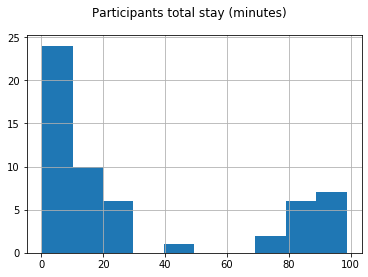

In [38]:
stay_plot = (participants["total_stay"].astype('timedelta64[s]') / 60).hist(bins=10)
plt.suptitle('Participants total stay (minutes)')


Text(0.5, 0.98, 'Time of final daparture histogram')

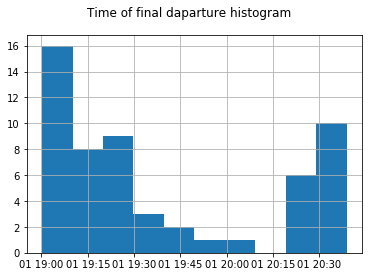

In [40]:
departure_plot = participants["last_departed"].hist()
plt.suptitle("Time of final daparture histogram")